In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 55kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

from keras import backend as K
import re

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
model = LGBMClassifier()
model = model.fit(X_train_st,y_train)
y_pred = model.predict(X_test_st)
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

F1 Score 0.33070035224365096
Accuracy Score 0.8493257160623373
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     21279
           1       0.60      0.31      0.41      1642
           2       0.42      0.05      0.08       761
           3       0.53      0.18      0.27       683
           4       0.57      0.14      0.23       663
           5       0.51      0.18      0.27       502
           6       0.38      0.08      0.14       201

    accuracy                           0.85     25731
   macro avg       0.55      0.28      0.33     25731
weighted avg       0.81      0.85      0.81     25731





### Hyper Parameter tunning of LGBM

In [ ]:

rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)

}
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

# Train on training data-
rs_cv.fit(X_train_st, y_train,verbose=1)

Another METHOD for Hypertune LGBM

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=6292e8897fa709f4a32f611988726539e0b19722804b22ce4c8b103d47616e42
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 6.1MB/s 


In [ ]:
import lightgbm as lgb
#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=1)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train_st, y_train, init_round=5, opt_round=10, n_folds=3, random_seed=1,n_estimators=5000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8429   |  0.8834   |  0.6763   |  0.01011  |  41.16    |  8.669    |  25.54    |  18.63    |  43.35    |  0.4028   |
|  2        |  0.8458   |  0.9078   |  0.4354   |  0.6884   |  34.31    |  26.95    |  21.64    |  67.05    |  47.37    |  0.5631   |
|  3        |  0.8412   |  0.8281   |  0.2585   |  0.8027   |  87.78    |  12.84    |  61.54    |  87.64    |  74.1     |  0.09419  |
|  4        |  0.8366   |  0.8078   |  0.2359   |  0.8794   |  26.88    |  15.53    |  77.47    |  53.32    |  62.75    |  0.3224   |
|  5        |  0.8537   |  0.9373   |  0.7677   |  0.02811  |  72.51    |  29.72    |  64.89    |  28.04    |  68.2     |  0.1122   |
|  6        |  0.8497   |  0.9141   |  0.8544   |  0.5124   | 

In [ ]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='multiclass'
opt_params[1]['metric']='multi_logloss'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params[1]['num_class']=7
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.979138959433012,
 'boost_from_average': False,
 'feature_fraction': 0.25137843327842113,
 'is_unbalance': True,
 'learning_rate': 0.2023702616289311,
 'max_bin': 69,
 'max_depth': 28,
 'metric': 'multi_logloss',
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 23.680010768693162,
 'num_class': 7,
 'num_leaves': 26,
 'objective': 'multiclass',
 'subsample': 0.12400774158996247}

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train_st, label=y_train)

clf = lgb.train(opt_params,d_train,100)
y_pred = clf.predict(X_test_st)
y_pred_1 = [np.argmax(line) for line in y_pred]

In [ ]:

print('F1 Score', metrics.f1_score(y_test,y_pred_1,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred_1))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred_1))
print('\n')

F1 Score 0.313803645037413
Accuracy Score 0.8485095798841864
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     21279
           1       0.61      0.31      0.41      1642
           2       0.38      0.04      0.08       761
           3       0.49      0.15      0.23       683
           4       0.52      0.13      0.21       663
           5       0.54      0.17      0.26       502
           6       0.29      0.04      0.08       201

    accuracy                           0.85     25731
   macro avg       0.53      0.26      0.31     25731
weighted avg       0.81      0.85      0.81     25731





### Feature Selection

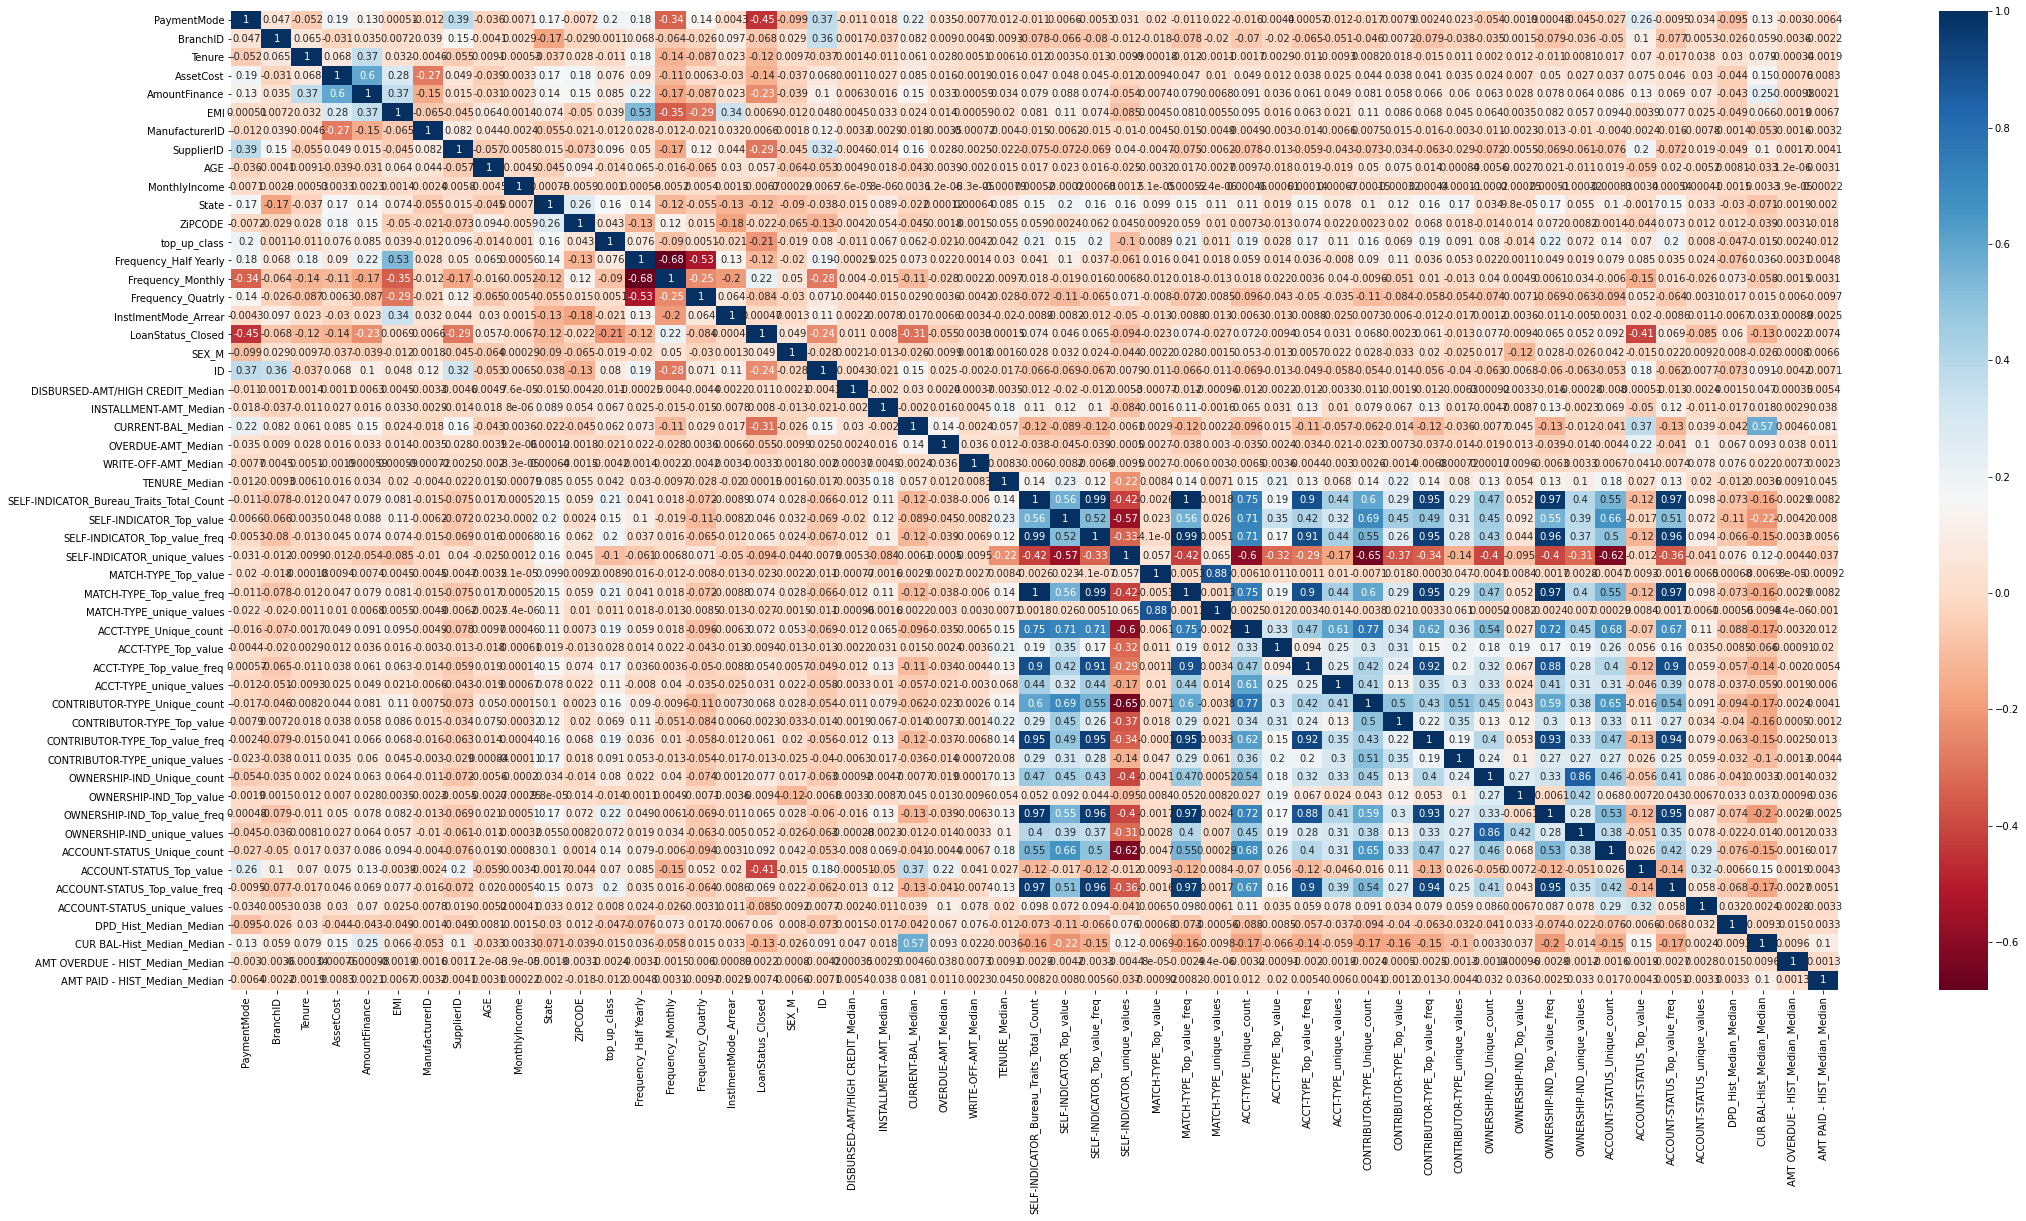

In [ ]:
dataset = train_dataset.copy()
plt.figure(figsize=(36, 18))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

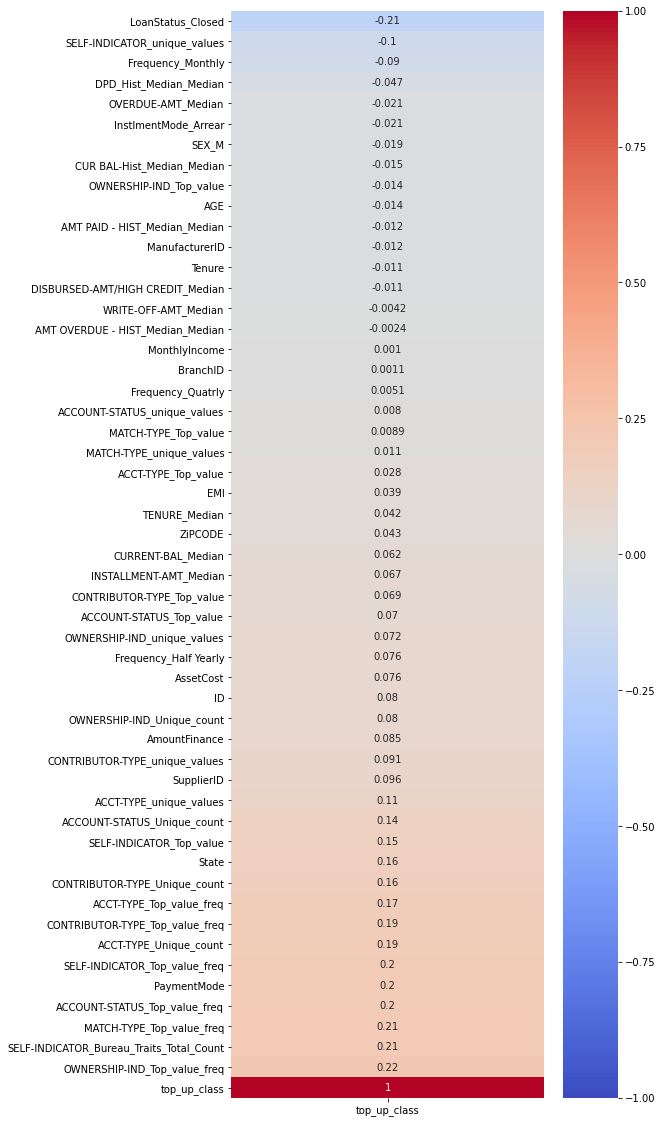

In [ ]:
plt.figure(figsize=(7, 20))
sns.heatmap(dataset.corr()[['top_up_class']].sort_values(by='top_up_class'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

In [ ]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['top_up_class'],axis=1)
dataset_only_independent.head(2)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.5,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.5,0.0,0.0


In [ ]:
dataset_only_independent.shape

(128654, 52)

In [ ]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [ ]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.8)
corr_features

{'ACCOUNT-STATUS_Top_value_freq',
 'ACCT-TYPE_Top_value_freq',
 'CONTRIBUTOR-TYPE_Top_value_freq',
 'MATCH-TYPE_Top_value_freq',
 'MATCH-TYPE_unique_values',
 'OWNERSHIP-IND_Top_value_freq',
 'OWNERSHIP-IND_unique_values',
 'SELF-INDICATOR_Top_value_freq'}

In [ ]:
train_dataset = train_dataset.drop(corr_features,axis=1)
test_dataset = test_dataset.drop(corr_features,axis=1)
train_dataset.shape , test_dataset.shape

((128654, 45), (14745, 44))

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 44) (25731, 44) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------Logistic Regression------------------------
F1 Score 0.1664
Accuracy Score 0.828
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     21279
           1       0.46      0.09      0.16      1642
           2       0.05      0.00      0.00       761
           3       0.31      0.02      0.04       683
           4       0.33      0.00      0.01       663
           5       0.34      0.03      0.05       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.33      0.16      0.17     25731
weighted avg       0.75      0.83      0.76     25731



------------------------KNN------------------------
F1 Score 0.1945
Accuracy Score 0.8219
Classification report 
 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     21279
           1       0.39      0.17      0.24    

### Extra Trees Classifier

In [ ]:
y_og_values = dataset['top_up_class']
y_og_values.head()

0    1
1    0
2    6
3    1
4    2
Name: top_up_class, dtype: int64

In [ ]:
model_feature_Selection = ExtraTreesClassifier()
model_feature_Selection.fit(dataset_only_independent,y_og_values)
print(model_feature_Selection.feature_importances_)

[3.31439065e-02 3.02720179e-02 3.28597643e-02 3.28073590e-02
 3.37596999e-02 3.37170199e-02 2.69870123e-02 3.38367088e-02
 3.39670619e-02 3.48717802e-02 2.79946261e-02 3.44229769e-02
 6.42349416e-03 5.08293503e-03 5.44703325e-03 5.09620397e-03
 1.76928302e-02 6.31514829e-03 3.54328425e-02 3.49189362e-02
 1.55366638e-02 2.97123802e-02 2.57264296e-03 9.43437113e-05
 1.61166675e-02 2.20801133e-02 1.52633792e-02 2.55694414e-02
 7.99926974e-03 1.02660854e-04 2.23362639e-02 1.60494911e-04
 2.15951804e-02 2.23735198e-02 2.12492477e-02 2.48960674e-02
 1.62474423e-02 1.57432344e-02 2.16397372e-02 1.68023840e-02
 1.11505441e-02 3.59532060e-03 2.60517160e-02 1.21543366e-02
 1.64005114e-02 1.55774667e-02 2.38796216e-02 1.55954116e-02
 2.29453079e-03 3.64349515e-02 5.70042122e-03 8.02467580e-03]


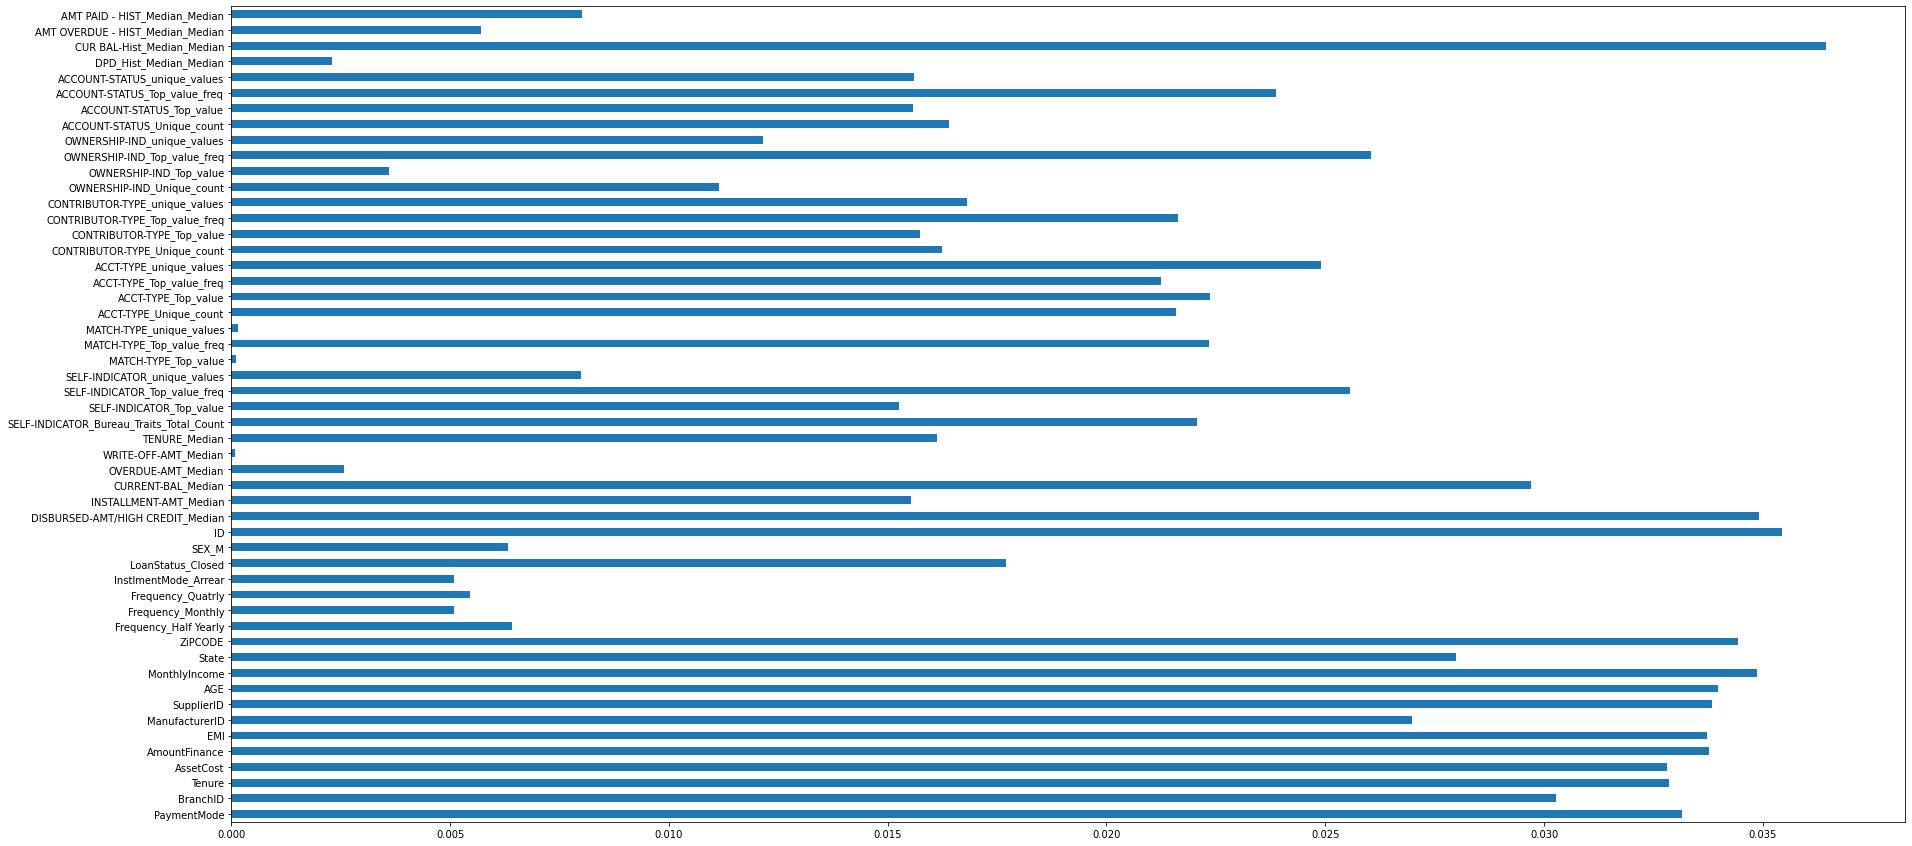

In [ ]:
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[30,15])
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
train_dataset.shape

(128654, 45)

### Handling Imbalanced Dataset

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
train_dataset['top_up_class'].value_counts()

0    106676
1      8366
2      3656
3      3492
4      3062
5      2368
6      1034
Name: top_up_class, dtype: int64

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
y

0         1
1         0
2         6
3         1
4         2
         ..
128649    3
128650    0
128651    0
128652    0
128653    0
Name: top_up_class, Length: 128654, dtype: int64

Class=1, n=8366 (6.503%)
Class=0, n=106676 (82.917%)
Class=6, n=1034 (0.804%)
Class=2, n=3656 (2.842%)
Class=5, n=2368 (1.841%)
Class=3, n=3492 (2.714%)
Class=4, n=3062 (2.380%)


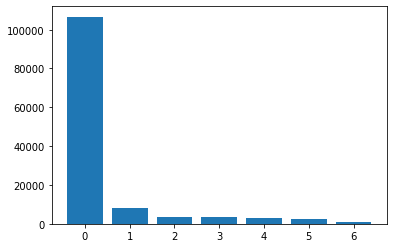

In [ ]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=1, n=106676 (14.286%)
Class=0, n=106676 (14.286%)
Class=6, n=106676 (14.286%)
Class=2, n=106676 (14.286%)
Class=5, n=106676 (14.286%)
Class=3, n=106676 (14.286%)
Class=4, n=106676 (14.286%)


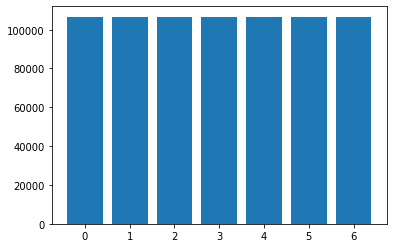

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X.shape ,y.shape

((746732, 52), (746732,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(597385, 52) (149347, 52) (597385,) (149347,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted
------------------------Logistic Regression------------------------
F1 Score 0.441
Accuracy Score 0.4495
Classification report 
 
              precision    recall  f1-score   support

           0       0.58      0.71      0.64     21066
           1       0.55      0.62      0.58     21359
           2       0.33      0.22      0.26     21275
           3       0.42      0.35      0.38     21591
           4       0.39      0.42      0.40     21391
           5       0.42      0.44      0.43     21260
           6       0.39      0.40      0.39     21405

    accuracy                           0.45    149347
   macro avg       0.44      0.45      0.44    149347
weighted avg       0.44      0.45      0.44    149347



------------------------KNN------------------------
F1 Score 0.9219
Accuracy Score 0.9257
Classification report 
 
      

### Combined Model

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf=RandomForestClassifier()


Ens = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn),('RandomForestClassifier',rf)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------COMBINED MODEL------------------------
F1 Score 0.9542675597627218
Accuracy Score 0.9553589961632976
Classification report 
 
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     21066
           1       0.92      0.95      0.93     21359
           2       0.95      0.97      0.96     21275
           3       0.96      0.98      0.97     21591
           4       0.96      0.98      0.97     21391
           5       0.97      0.99      0.98     21260
           6       0.98      1.00      0.99     21405

    accuracy                           0.96    149347
   macro avg       0.96      0.96      0.95    149347
weighted avg       0.96      0.96      0.95    149347





#### Random Forest Classifier With Imbalanced Dataset Handling

In [ ]:
X.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


In [ ]:
X.shape ,y.shape

((746732, 52), (746732,))

Class=1, n=106676 (14.286%)
Class=0, n=106676 (14.286%)
Class=6, n=106676 (14.286%)
Class=2, n=106676 (14.286%)
Class=5, n=106676 (14.286%)
Class=3, n=106676 (14.286%)
Class=4, n=106676 (14.286%)


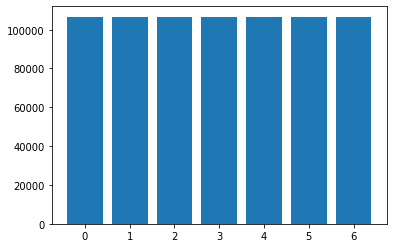

In [ ]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X.shape , y.shape

((746732, 52), (746732,))

In [ ]:
X.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


In [ ]:
test_dataset.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
X.shape , y.shape , test_dataset.shape

((128654, 52), (128654,), (14745, 52))

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_dataset)

In [ ]:
weights = {0:1.0, 1:3.0, 2:3.0, 3:3.0, 4:3.0, 5:3.0,6:3.0}
model_rf_final_submit = RandomForestClassifier(n_estimators=1000, class_weight=weights)

#model_rf_final_submit = RandomForestClassifier()
model_rf_final_submit = model_rf_final_submit.fit(X_st,y)

y_pred = model_rf_final_submit.predict(test_final_st)

In [ ]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    14531
 > 48 Months           191
24-30 Months             8
30-36 Months             7
36-48 Months             6
18-24 Months             2
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_rf_updated_final_train1.csv',index=False)

In [ ]:
X.shape

(746732, 52)

### Cat boost


In [ ]:
model_rf_final_submit = CatBoostClassifier()
model_rf_final_submit = model_rf_final_submit.fit(X_st,y)

y_pred = model_rf_final_submit.predict(test_final_st)

Learning rate set to 0.11088
0:	learn: 1.8328049	total: 1.56s	remaining: 25m 58s
1:	learn: 1.7531686	total: 3.06s	remaining: 25m 25s
2:	learn: 1.6924924	total: 4.62s	remaining: 25m 36s
3:	learn: 1.6464844	total: 5.97s	remaining: 24m 47s
4:	learn: 1.6061143	total: 7.44s	remaining: 24m 39s
5:	learn: 1.5743202	total: 8.92s	remaining: 24m 37s
6:	learn: 1.5468019	total: 10.3s	remaining: 24m 24s
7:	learn: 1.5232286	total: 11.8s	remaining: 24m 25s
8:	learn: 1.5014691	total: 13.4s	remaining: 24m 32s
9:	learn: 1.4842477	total: 14.8s	remaining: 24m 24s
10:	learn: 1.4673298	total: 16.4s	remaining: 24m 30s
11:	learn: 1.4513390	total: 17.9s	remaining: 24m 31s
12:	learn: 1.4384228	total: 19.2s	remaining: 24m 18s
13:	learn: 1.4268623	total: 20.6s	remaining: 24m 12s
14:	learn: 1.4166685	total: 22s	remaining: 24m 1s
15:	learn: 1.4061389	total: 23.4s	remaining: 23m 56s
16:	learn: 1.3975522	total: 24.7s	remaining: 23m 49s
17:	learn: 1.3894646	total: 26s	remaining: 23m 35s
18:	learn: 1.3822922	total: 27.3

In [ ]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = y_pred
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    11662
 > 48 Months          1783
36-48 Months           433
30-36 Months           355
24-30 Months           288
18-24 Months           133
12-18 Months            91
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_cat_bur_final.csv',index=False)

###### Handling Muliclass Imbalanced

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
weights = {0:1.0, 1:3.0, 2:3.0, 3:3.0, 4:3.0, 5:3.0,6:3.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
## Training the Ensemble learning:
model= model.fit(X_train_st , y_train)

y_pred = model.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------COMBINED MODEL------------------------
F1 Score 0.2685861220926517
Accuracy Score 0.8452838987991139
Classification report 
 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     21279
           1       0.70      0.21      0.33      1642
           2       0.70      0.02      0.04       761
           3       0.63      0.13      0.22       683
           4       0.55      0.09      0.15       663
           5       0.59      0.11      0.18       502
           6       0.33      0.02      0.04       201

    accuracy                           0.85     25731
   macro avg       0.62      0.23      0.27     25731
weighted avg       0.81      0.85      0.80     25731





### Other Class Weight Techniques

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.utils import class_weight
class_weight = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train))) 
model = RandomForestClassifier(n_estimators=1000,class_weight = class_weight)

# ['balanced', 'calculated balanced', 'normalized'] are hyperpaameters whic we can play with.
model= model.fit(X_train_st , y_train)

y_pred = model.predict(X_test_st)
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

F1 Score 0.21235216991748704
Accuracy Score 0.838754809373907
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     21279
           1       0.75      0.15      0.25      1642
           2       0.83      0.01      0.03       761
           3       0.72      0.07      0.13       683
           4       0.64      0.05      0.09       663
           5       0.75      0.03      0.06       502
           6       1.00      0.01      0.02       201

    accuracy                           0.84     25731
   macro avg       0.79      0.19      0.21     25731
weighted avg       0.83      0.84      0.78     25731





### Using Border Line SMOTE

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=85397 (14.286%)
Class=4, n=85397 (14.286%)
Class=1, n=85397 (14.286%)
Class=5, n=85397 (14.286%)
Class=2, n=85397 (14.286%)
Class=3, n=85397 (14.286%)
Class=6, n=85397 (14.286%)


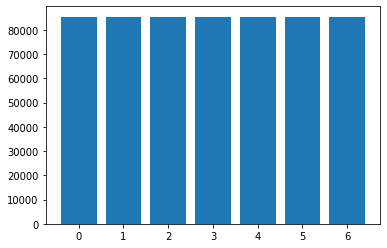

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE 
#oversample = SMOTE()
sm = BorderlineSMOTE(random_state=1)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
for k,v in counter.items():
	per = v / len(y_train_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.30096191125595906
Accuracy Score 0.8340523104426567
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     21279
           1       0.49      0.31      0.38      1642
           2       0.27      0.04      0.07       761
           3       0.34      0.23      0.27       683
           4       0.40      0.14      0.20       663
           5       0.40      0.13      0.20       502
           6       0.39      0.03      0.06       201

    accuracy                           0.83     25731
   macro avg       0.45      0.26      0.30     25731
weighted avg       0.79      0.83      0.80     25731





#### Using Smote with pre defined class nos

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


Class=0, n=85397 (82.972%)
Class=4, n=2399 (2.331%)
Class=1, n=6724 (6.533%)
Class=5, n=1866 (1.813%)
Class=2, n=2895 (2.813%)
Class=3, n=2809 (2.729%)
Class=6, n=833 (0.809%)


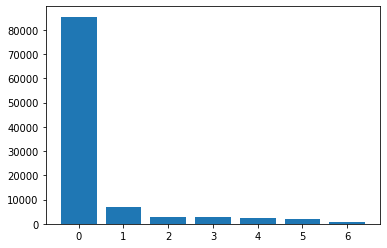

In [ ]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek
counter = Counter(y_train)
sm = SMOTETomek(random_state=1)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(counter)

Counter({6: 85390, 5: 85382, 4: 85371, 2: 85366, 3: 85348, 1: 85250, 0: 85144})


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3402433777575827
Accuracy Score 0.8288834479810345
Classification report 
 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21279
           1       0.48      0.33      0.39      1642
           2       0.27      0.07      0.11       761
           3       0.32      0.27      0.29       683
           4       0.35      0.19      0.24       663
           5       0.34      0.26      0.29       502
           6       0.25      0.09      0.14       201

    accuracy                           0.83     25731
   macro avg       0.41      0.31      0.34     25731
weighted avg       0.79      0.83      0.81     25731





SMOTE ENN

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


Class=0, n=85397 (82.972%)
Class=4, n=2399 (2.331%)
Class=1, n=6724 (6.533%)
Class=5, n=1866 (1.813%)
Class=2, n=2895 (2.813%)
Class=3, n=2809 (2.729%)
Class=6, n=833 (0.809%)


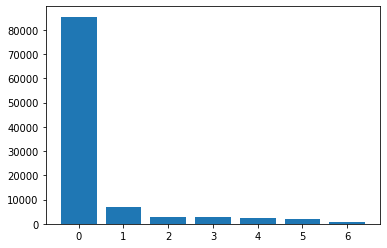

In [ ]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN
counters = Counter(y_train)
print(counters)
sm = SMOTEENN()
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
print(counter)

Counter({0: 85397, 1: 6724, 2: 2895, 3: 2809, 4: 2399, 5: 1866, 6: 833})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({6: 85331, 5: 84748, 4: 84448, 3: 84259, 2: 84103, 1: 82923, 0: 39354})


In [ ]:
print(counter)

Counter({6: 85390, 5: 85382, 4: 85371, 2: 85366, 3: 85348, 1: 85250, 0: 85144})


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3178619287577665
Accuracy Score 0.6887800707318021
Classification report 
 
              precision    recall  f1-score   support

           0       0.94      0.75      0.83     21279
           1       0.26      0.64      0.37      1642
           2       0.13      0.20      0.16       761
           3       0.18      0.40      0.25       683
           4       0.19      0.27      0.22       663
           5       0.18      0.34      0.24       502
           6       0.14      0.16      0.15       201

    accuracy                           0.69     25731
   macro avg       0.29      0.39      0.32     25731
weighted avg       0.81      0.69      0.73     25731



